In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12; plt.rcParams['xtick.major.size'] = 8
plt.rcParams['font.family'] = 'STIXgeneral'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = 'Computer Modern Roman'

plt.rcParams['figure.figsize'] = [14,11]

In [2]:
t_f = str(datetime.date.today())
t_i = str(datetime.date.today()-datetime.timedelta(days=59))
print(f'intraday start: t_i = {t_i} \nintraday stop: t_f = {t_f} (today)')

intraday start: t_i = 2025-01-19 
intraday stop: t_f = 2025-03-19 (today)


In [3]:
tickers = ['PSI','NVDA','AVGO','LRCX','ADI','QCOM','TXN','AMAT','MU','ACMR','NVMI','QQQ', \
           'SPXT','BRK-B','VDE','VNQ','VHT','VTI','VXUS','XLE','XLI','XLF','XLK','XLY',   \
           'XLP','XLV', 'XLB', 'GDX', 'XOP', 'IYR', 'XHB', \
           'AAPL', 'MSFT', 'GOOG', 'META', 'TSLA']
try:
    df
    df_daily
except NameError:
    df = pd.DataFrame(index=None)
    df_daily = pd.DataFrame(index=None)

for ticker in tickers:
    if ticker in list(df.columns):
        continue
    data = yf.download(ticker, start='2023-01-01', end=t_f)
    df_daily[ticker] = data['Close']

df_daily = df_daily.dropna(axis=1)

for ticker in tickers:
    if ticker in list(df.columns):
        continue
    data = yf.download(ticker, start=t_i, end=t_f, interval='5m')
    df[ticker] = data['Close']

df = df.dropna(axis=1)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<Axes: xlabel='Date'>

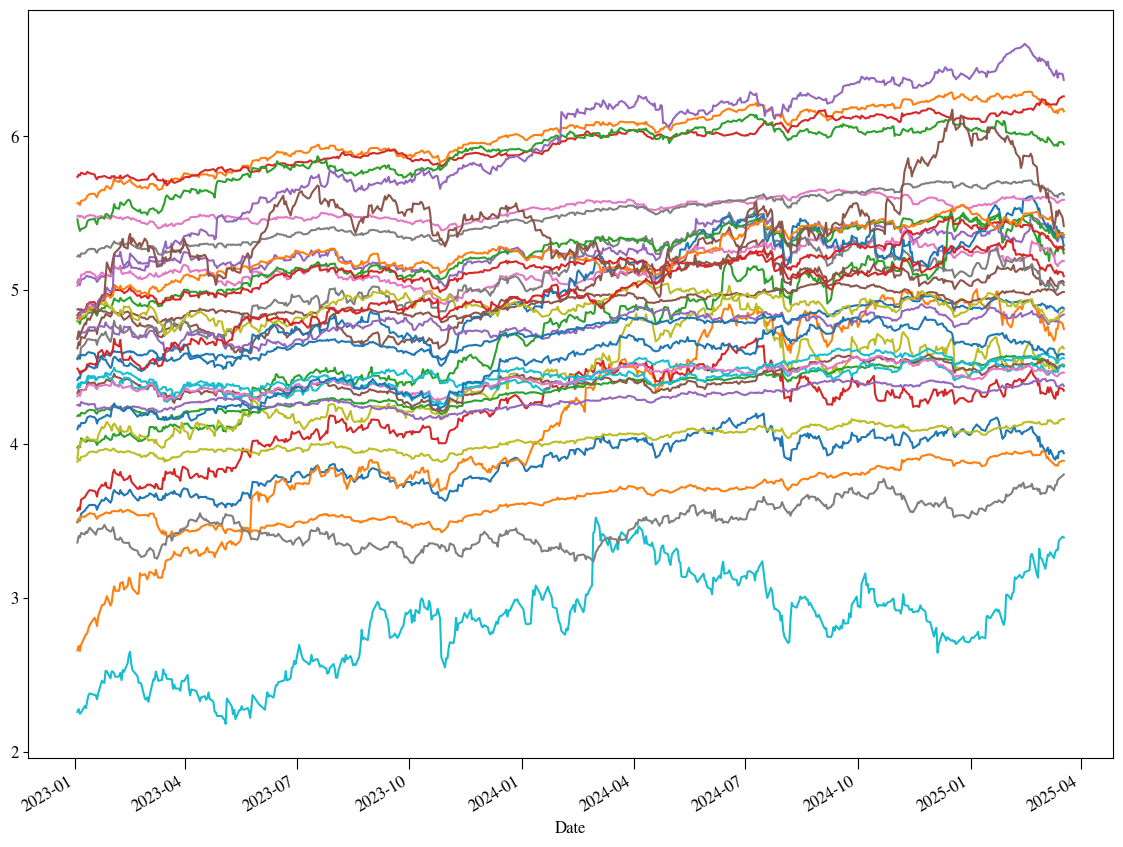

In [4]:
df_daily.apply(np.log).dropna().plot(legend=None)

In [ ]:
df_daily.shape, df.shape

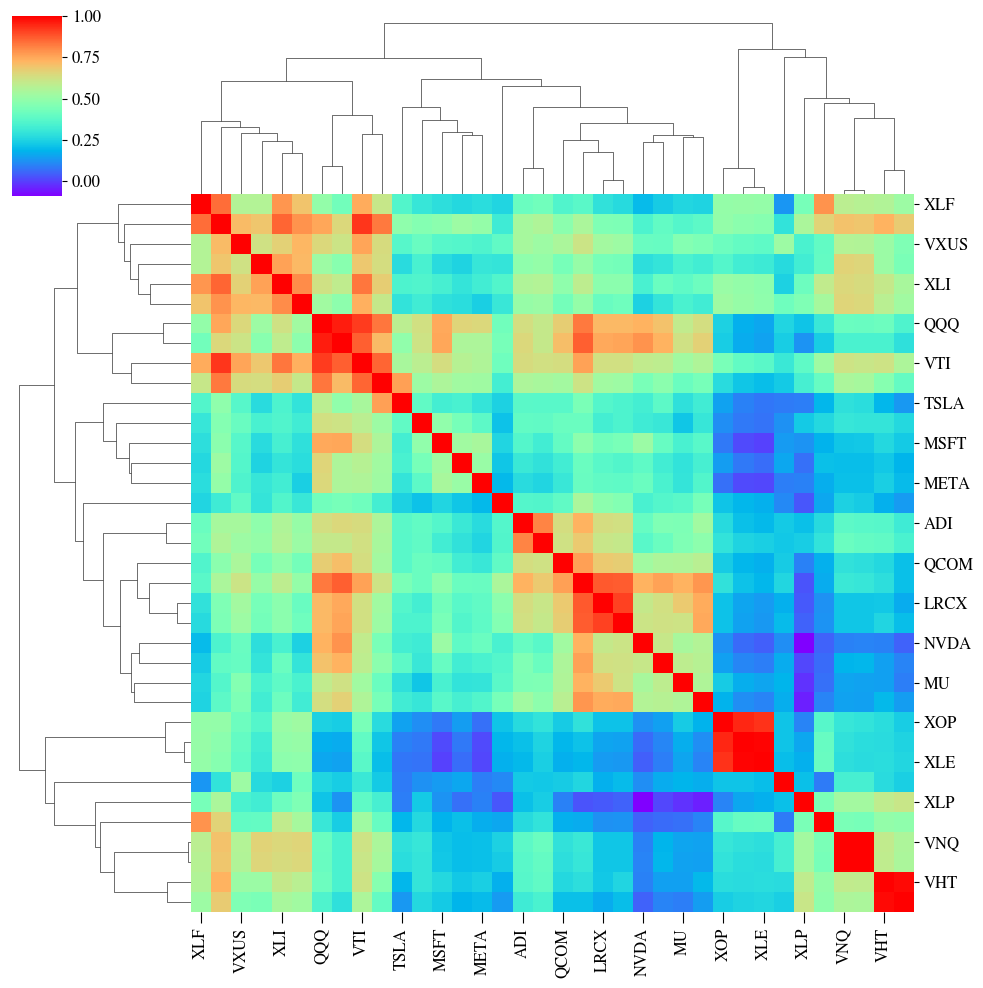

In [5]:
cm = sns.clustermap(df_daily.apply(np.log).diff().dropna().corr(),cmap='rainbow')
s,r = cm.dendrogram_row.reordered_ind, cm.dendrogram_col.reordered_ind
s,r = np.array(s), np.array(r)

<Axes: >

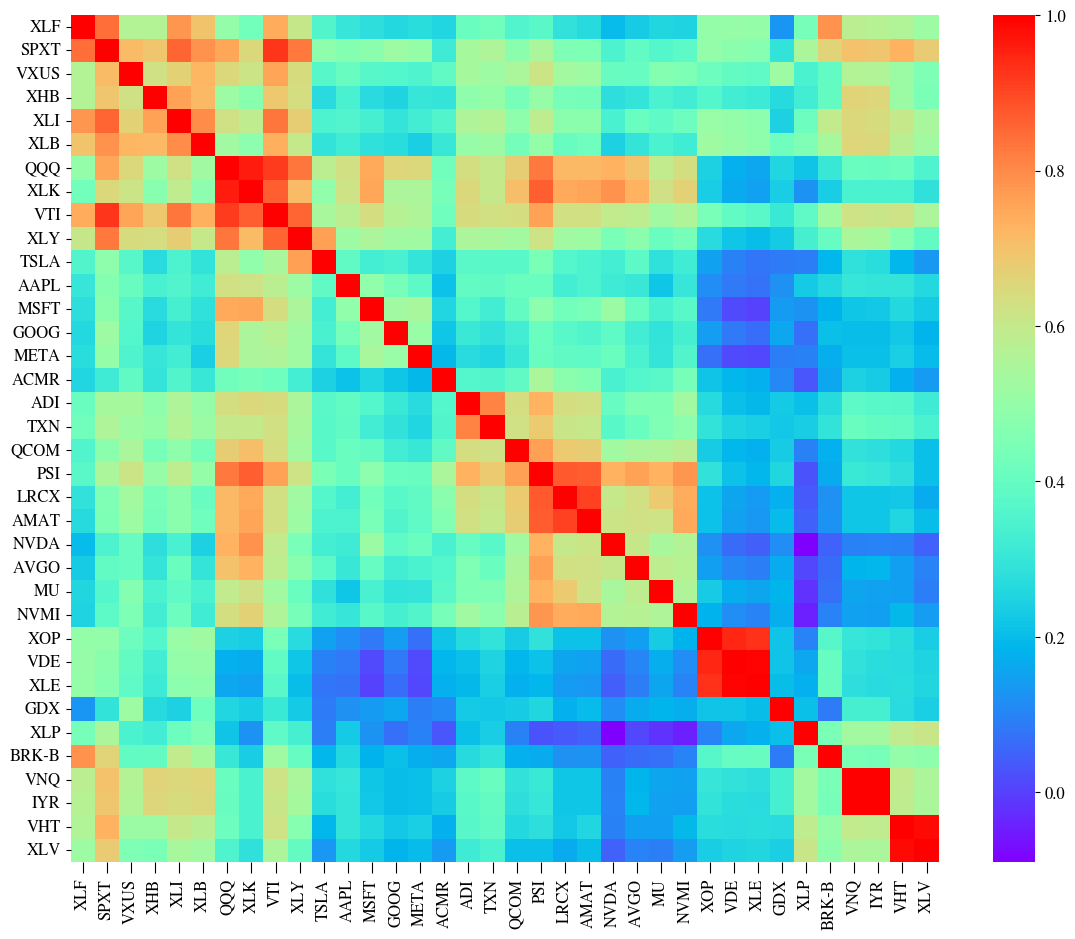

In [6]:
sns.heatmap(df_daily.apply(np.log).diff().dropna().corr().iloc[s,r],cmap='rainbow')